# Importing modules

In [1]:
from model import Agent
from imageData import Data, train_val_split
from torch.utils.data import DataLoader
from torch.nn import MSELoss
from torch.optim import Adam
from hypParam import *
from statistics import mean
import matplotlib.pyplot as plt

# Defining the Model and the Data

In [2]:
agent = Agent().to(device)
mse_loss = MSELoss()
optim = Adam(agent.parameters(), lr)

In [3]:
train_log, val_log = train_val_split("../Data/driving_log.csv")
train = Data(train_log, training = True)
val = Data(val_log, training = False)

In [4]:
train_loader = DataLoader(train, batch_size, shuffle=True, pin_memory=True, num_workers=no_workers)

# Training the Model

In [5]:
train_losses = []
val_losses = []
for epoch in range(1, no_epochs+1):
    episode_losses = []
    for X, y in train_loader:
        X = X.to(device)
        y = y.to(device)
        y_pred = torch.squeeze(agent(X))
        loss = mse_loss(y_pred, y)
        optim.zero_grad()
        loss.backward()
        optim.step()
        episode_losses.append(loss.item())
    with torch.no_grad():
        y_val_pred = torch.squeeze(agent(val.data))
        val_loss = mse_loss(y_val_pred, val.labels)
        train_losses.append(round(mean(episode_losses), 4))
        val_losses.append(round(val_loss.item(), 4))

    print(f"Epoch: {epoch},  train loss: {train_losses[-1]},  val loss: {val_losses[-1]}")


Epoch: 1,  train loss: 0.0313,  val loss: 0.0177
Epoch: 2,  train loss: 0.0165,  val loss: 0.0136
Epoch: 3,  train loss: 0.0148,  val loss: 0.0138
Epoch: 4,  train loss: 0.0144,  val loss: 0.0129
Epoch: 5,  train loss: 0.0141,  val loss: 0.0136
Epoch: 6,  train loss: 0.0139,  val loss: 0.0126
Epoch: 7,  train loss: 0.0136,  val loss: 0.013
Epoch: 8,  train loss: 0.0136,  val loss: 0.0127
Epoch: 9,  train loss: 0.0135,  val loss: 0.0129
Epoch: 10,  train loss: 0.0133,  val loss: 0.0125
Epoch: 11,  train loss: 0.0134,  val loss: 0.0127
Epoch: 12,  train loss: 0.0132,  val loss: 0.0127
Epoch: 13,  train loss: 0.0132,  val loss: 0.0124
Epoch: 14,  train loss: 0.0131,  val loss: 0.0125
Epoch: 15,  train loss: 0.0131,  val loss: 0.0125
Epoch: 16,  train loss: 0.0131,  val loss: 0.0124
Epoch: 17,  train loss: 0.013,  val loss: 0.0125
Epoch: 18,  train loss: 0.0129,  val loss: 0.0124
Epoch: 19,  train loss: 0.0128,  val loss: 0.0127
Epoch: 20,  train loss: 0.0128,  val loss: 0.0123


In [6]:
torch.save(agent.state_dict(), './parameters/agent_param.pt')

# Ploting the Learning Curve

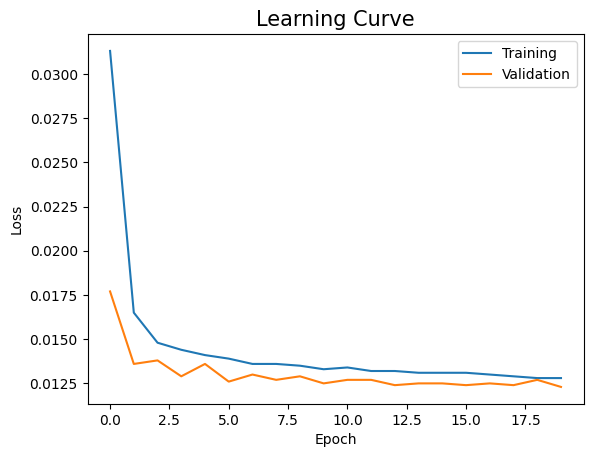

In [7]:
plt.plot(train_losses)
plt.plot(val_losses)
plt.xlabel("Epoch", size=10)
plt.ylabel("Loss", size=10)
plt.legend(["Training", "Validation"])
plt.title("Learning Curve", size=15)
plt.savefig("Learning_Curve.png");